In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import backtrader as bt
import yfinance as yf

In [7]:
class MACDStrategy(bt.Strategy):
    params = (
        ('macd1', 12),
        ('macd2', 26),
        ('macdsig', 9),
    )

    def __init__(self):
        self.macd = bt.indicators.MACD(self.data.close, 
                                       period_me1=self.p.macd1, 
                                       period_me2=self.p.macd2, 
                                       period_signal=self.p.macdsig)

    def next(self):
        if self.macd.macd[0] > self.macd.signal[0] and self.macd.macd[-1] <= self.macd.signal[-1]:
            self.buy()
        elif self.macd.macd[0] < self.macd.signal[0] and self.macd.macd[-1] >= self.macd.signal[-1]:
            self.sell()


In [8]:
class MACDHistoStrategy(bt.Strategy):
    params = (
        ('macd1', 12),
        ('macd2', 26),
        ('macdsig', 9),
    )

    def __init__(self):
        self.macd = bt.indicators.MACDHisto(self.data.close, 
                                            period_me1=self.p.macd1, 
                                            period_me2=self.p.macd2, 
                                            period_signal=self.p.macdsig)

    def next(self):
        if self.macd.histo[0] > 0 and self.macd.histo[-1] <= 0:
            self.buy()
        elif self.macd.histo[0] < 0 and self.macd.histo[-1] >= 0:
            self.sell()

In [9]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(MACDHistoStrategy)

# Download historical data from Yahoo finance using yfinance
data_df = yf.download('AAPL', start='2018-01-01', end='2023-12-31')

# Use PandasData to feed the DataFrame to Backtrader
data = bt.feeds.PandasData(dataname=data_df)

# Add the data feed to Cerebro
cerebro.adddata(data)

# Set our desired cash start
cerebro.broker.setcash(100000.0)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

[*********************100%***********************]  1 of 1 completed
Starting Portfolio Value: 100000.00
Final Portfolio Value: 99977.74


<IPython.core.display.Javascript object>

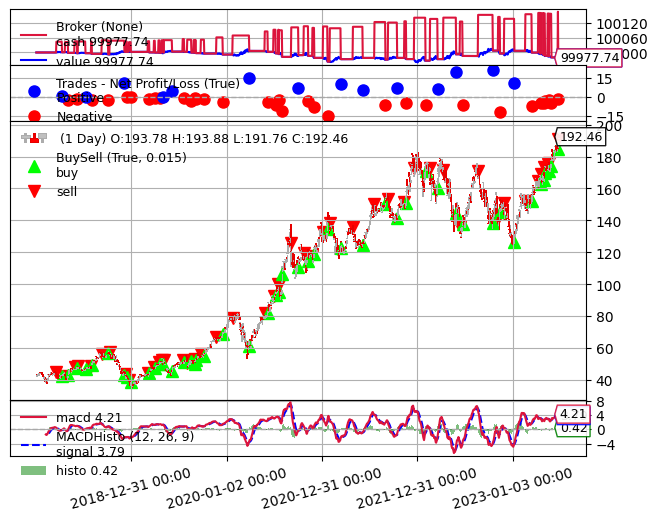

In [10]:
%matplotlib inline
cerebro.plot(style='candlestick', volume=False)[0][0]